In [1]:
from torchvision.datasets import EuroSAT

In [2]:
data = EuroSAT(root='../data/01_raw')

In [3]:
data.class_to_idx

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame({
    'path': [data.imgs[i][0] for i in range(len(data))],
    'class': [data.imgs[i][1] for i in range(len(data))]
})

In [6]:
# invert class to idx -> idx to class
idx_to_class = {v: k for k, v in data.class_to_idx.items()}

In [7]:
df['class_label'] = df['class'].map(idx_to_class)

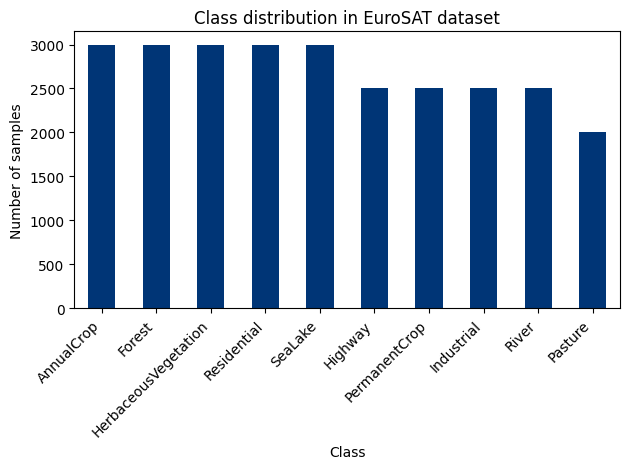

In [12]:
# Make a bar plot showing the balance between classes
import matplotlib.pyplot as plt

df['class_label'].value_counts().plot(kind='bar', color='#003576')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class distribution in EuroSAT dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Make a report into missing values, nan values or other problem values in class
missing_values_report = df['class'].isnull().sum()
missing_values_report

np.int64(0)

In [19]:
data.indices

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 data.indices                                                                                 │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: 'EuroSAT' object has no attribute 'indices'

In [19]:
catalog.load('parameters')

[12/08/25 21:50:27] INFO     Loading data from parameters (MemoryDataset)...                   ]8;id=768272;file:///home/rafael/private/ufrj/CPE727-trabalho-final/.venv/lib/python3.13/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=481164;file:///home/rafael/private/ufrj/CPE727-trabalho-final/.venv/lib/python3.13/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\


{
    'dataset': {'root': 'data/01_raw', 'download': True},
    'train_test_split': {'dev_ratio': 0.8, 'seed': 42},
    'cross_validation': {'n_splits': 5, 'shuffle': True, 'seed': 42},
    'data_loaders': {'batch_size': 32, 'num_workers': 4, 'pin_memory': True},
    'models': {
        'vgg16': {
            'name': 'vgg16',
            'pretrained': True,
            'num_classes': 10,
            'freeze_backbone': False,
            'dropout': 0.5
        },
        'resnet50': {
            'name': 'resnet50',
            'pretrained': True,
            'num_classes': 10,
            'freeze_backbone': False
        },
        'vit': {
            'name': 'vit_b_16',
            'pretrained': True,
            'num_classes': 10,
            'freeze_backbone': False,
            'image_size': 224
        }
    },
    'training': {
        'epochs': 50,
        'learning_rate': 0.0001,
        'weight_decay': 0.0001,
        'scheduler': {'type': 'ReduceLROnPlateau', 'mode': 'min',

In [22]:
import pickle

# Read cross_val_table and dev_dataset
cross_val_table = pd.read_parquet('../data/02_intermediate/cross_val_table.parquet')

with open('../data/02_intermediate/dev_dataset.pkl', 'rb') as f:
    dev_dataset = pickle.load(f)

# Statistics about each fold and class/fold
print("Cross-validation table shape:", cross_val_table.shape)
print("\nFold distribution:")
print(cross_val_table['fold'].value_counts().sort_index())

# Class distribution per fold
print("\nClass distribution per fold:")
for fold in sorted(cross_val_table['fold'].unique()):
    train_data = cross_val_table[cross_val_table['fold'] != fold]
    val_data = cross_val_table[cross_val_table['fold'] == fold]
    print(f"\nFold {fold}:")
    print(f"  Total Training samples: {len(train_data)}")
    class_dist = train_data['label'].value_counts().sort_index()
    for class_idx, count in class_dist.items():
        class_name = idx_to_class.get(class_idx, f'Class {class_idx}')
        print(f"    {class_name}: {count}")
    print(f"  Total Validation samples: {len(val_data)}")
    class_dist = val_data['label'].value_counts().sort_index()
    for class_idx, count in class_dist.items():
        class_name = idx_to_class.get(class_idx, f'Class {class_idx}')
        print(f"    {class_name}: {count}")


Cross-validation table shape: (21600, 6)

Fold distribution:
fold
0    4320
1    4320
2    4320
3    4320
4    4320
Name: count, dtype: int64

Class distribution per fold:

Fold 0:
  Total Training samples: 17280
    AnnualCrop: 1895
    Forest: 1934
    HerbaceousVegetation: 1911
    Highway: 1580
    Industrial: 1612
    Pasture: 1283
    PermanentCrop: 1596
    Residential: 1915
    River: 1602
    SeaLake: 1952
  Total Validation samples: 4320
    AnnualCrop: 474
    Forest: 484
    HerbaceousVegetation: 477
    Highway: 395
    Industrial: 404
    Pasture: 321
    PermanentCrop: 398
    Residential: 479
    River: 401
    SeaLake: 487

Fold 1:
  Total Training samples: 17280
    AnnualCrop: 1895
    Forest: 1934
    HerbaceousVegetation: 1910
    Highway: 1580
    Industrial: 1613
    Pasture: 1283
    PermanentCrop: 1595
    Residential: 1916
    River: 1603
    SeaLake: 1951
  Total Validation samples: 4320
    AnnualCrop: 474
    Forest: 484
    HerbaceousVegetation: 478
    Hi

In [20]:
cross_val_table

,sample_idx,original_idx,image_path,label,class_name,fold
0,0,4542,data/01_raw/eurosat/2750/Forest/Forest_2387.jpg,1,Forest,0
1,1,1781,data/01_raw/eurosat/2750/AnnualCrop/AnnualCrop...,0,AnnualCrop,3
2,2,1366,data/01_raw/eurosat/2750/AnnualCrop/AnnualCrop...,0,AnnualCrop,2
3,3,19963,data/01_raw/eurosat/2750/Residential/Residenti...,7,Residential,1
4,4,16858,data/01_raw/eurosat/2750/PermanentCrop/Permane...,6,PermanentCrop,0
...,...,...,...,...,...,...
21595,21595,17613,data/01_raw/eurosat/2750/PermanentCrop/Permane...,6,PermanentCrop,2
21596,21596,7814,data/01_raw/eurosat/2750/HerbaceousVegetation/...,2,HerbaceousVegetation,3
21597,21597,2671,data/01_raw/eurosat/2750/AnnualCrop/AnnualCrop...,0,AnnualCrop,3
21598,21598,5849,data/01_raw/eurosat/2750/Forest/Forest_863.jpg,1,Forest,1


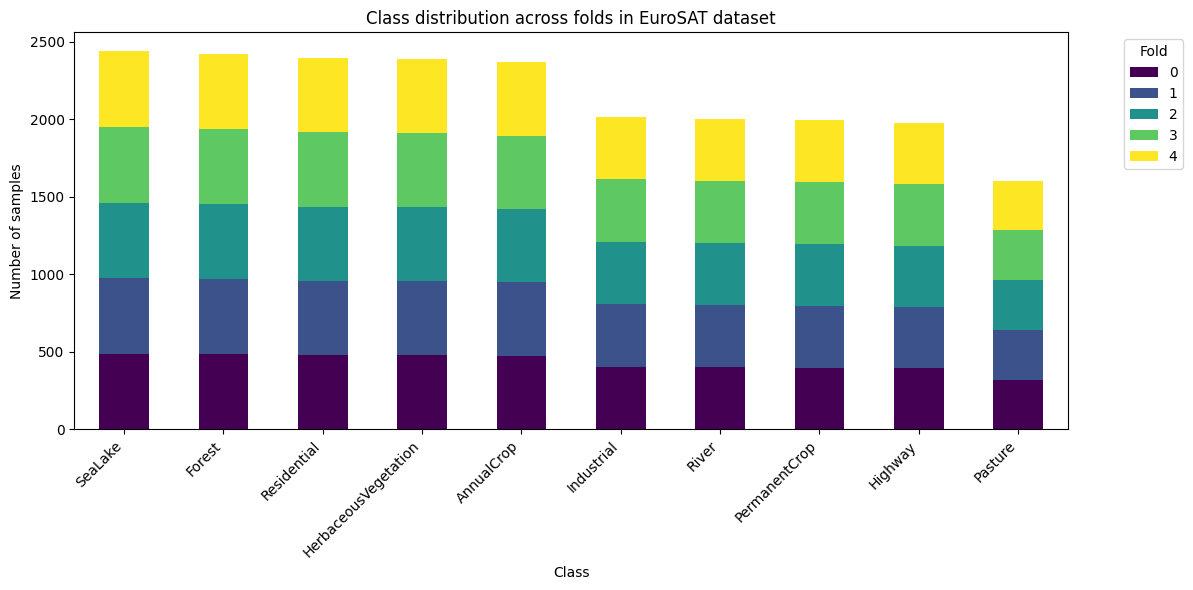

In [26]:
# Create a pivot table for stacked bar plot
pivot_data = cross_val_table.groupby(['class_name', 'fold']).size().unstack(fill_value=0)

# Sort by total samples per class in descending order
pivot_data = pivot_data.loc[pivot_data.sum(axis=1).sort_values(ascending=False).index]

# Create stacked bar plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class distribution across folds in EuroSAT dataset')
plt.legend(title='Fold', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()